In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt' 'content/gdrive/My Drive/quickdraw/dataset'

--2019-07-11 04:23:57--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt.7’

mini_classes.txt.7  100%[===================>]     760  --.-KB/s    in 0s      

2019-07-11 04:23:57 (108 MB/s) - ‘mini_classes.txt.7’ saved [760/760]

--2019-07-11 04:23:57--  http://content/gdrive/My%20Drive/quickdraw/dataset
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
FINISHED --2019-07-11 04:23:57--
Total wall clock time: 0.07s
Downloaded: 1 files, 760 in 0s (108 MB/s)


In [0]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [0]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [0]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, '/content/drive/My Drive/quickdraw/dataset/'+c+'.npy')

In [18]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

In [14]:
!ls "/content/drive"

'My Drive'


In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('/content/drive/My Drive/quickdraw/dataset')
num_classes = len(class_names)
image_size = 28

In [26]:
print(class_names)

['drums', 'sun', 'laptop', 'anvil', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'power_outlet', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rain

In [27]:
print(len(x_train))

320000


In [28]:
print(len(x_test))

80000


lollipop


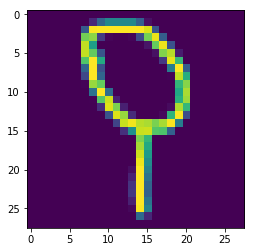

In [29]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

Preprocessing


In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

W0711 04:37:19.747378 140341807839104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [34]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=10)

Train on 288000 samples, validate on 32000 samples
Epoch 1/10
288000/288000 - 13s - loss: 0.8820 - top_k_categorical_accuracy: 0.9312 - val_loss: 0.9468 - val_top_k_categorical_accuracy: 0.9241
Epoch 2/10
288000/288000 - 13s - loss: 0.8482 - top_k_categorical_accuracy: 0.9340 - val_loss: 0.9200 - val_top_k_categorical_accuracy: 0.9268
Epoch 3/10
288000/288000 - 13s - loss: 0.8200 - top_k_categorical_accuracy: 0.9367 - val_loss: 0.9007 - val_top_k_categorical_accuracy: 0.9280
Epoch 4/10
288000/288000 - 13s - loss: 0.7977 - top_k_categorical_accuracy: 0.9390 - val_loss: 0.8940 - val_top_k_categorical_accuracy: 0.9284
Epoch 5/10
288000/288000 - 13s - loss: 0.7774 - top_k_categorical_accuracy: 0.9409 - val_loss: 0.8950 - val_top_k_categorical_accuracy: 0.9291
Epoch 6/10
288000/288000 - 13s - loss: 0.7582 - top_k_categorical_accuracy: 0.9427 - val_loss: 0.8870 - val_top_k_categorical_accuracy: 0.9296
Epoch 7/10
288000/288000 - 13s - loss: 0.7446 - top_k_categorical_accuracy: 0.9439 - val_lo

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 93.21%


In [0]:
# Save the weights

model.save_weights('/content/drive/My Drive/quickdraw/weight/w')


In [39]:
# Restore the weights
#model = create_model()
model.load_weights('/content/drive/My Drive/quickdraw/weight/w')

In [41]:
# Save entire model to a HDF5 file
model.save('/content/drive/My Drive/quickdraw/weight/my_model.h5')

W0711 04:55:53.723969 140341807839104 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


In [42]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('/content/drive/My Drive/quickdraw/weight/my_model.h5')
new_model.summary()

W0711 04:56:31.514248 140341807839104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0711 04:56:31.523349 140341807839104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0711 04:56:31.796104 140341807839104 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

True Label  pants
Pred Label  shorts


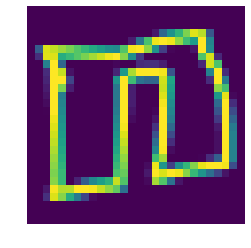

In [43]:
#get predictions and true labels
yhat = np.argmax(model.predict(x_test), axis = 1)
y    = np.argmax(y_test, axis = 1)

#get the indices of the bad labels 
bad_labels = np.argwhere((y == yhat) == False).squeeze()

#choose a random index with incorrect label 
idx = np.random.choice(bad_labels)

print('True Label ',class_names[y[idx]])
print('Pred Label ',class_names[yhat[idx]])
plt.imshow(x_test[idx].squeeze())
plt.axis('off')
plt.show()

In [50]:
print(x_test[0].shape)

(28, 28, 1)


In [0]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="float32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

In [0]:
img = load_image('/content/drive/My Drive/quickdraw/pant (1).png')

In [129]:
print(img.shape)
img = img.reshape(28,28)
img = img.reshape(img.shape[0],img.shape[1],1).astype('float32')
print(type(img))
img = np.where(img == 0, 255, img) 
img = np.where(img == 240, 0, img) 


(304, 304)


ValueError: ignored

In [0]:
img /= 255.0

In [126]:
pre = np.argmax(model.predict(img))

ValueError: ignored

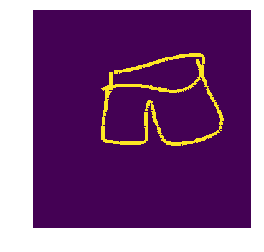

In [109]:
plt.imshow(img.squeeze())
plt.axis('off')
plt.show()

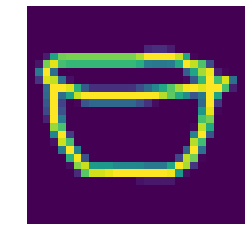

In [82]:
plt.imshow(x_test[0].squeeze())
plt.axis('off')
plt.show()

In [111]:
print(x_test[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 